<a href="https://colab.research.google.com/github/DeeeTeeee/AZUBISTORE/blob/master/telcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction -- ML Classification

## 1. Importing Libraries

In [1]:
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

# !pip install inflection
# !pip install dython
# !pip install shap
# !pip install -U kaleido


#!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
#import shap

# 2. Data Understanding

## 2.1.  Reading Dataset

In [7]:
path = '/content/Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.2 Duplicate Values

In [9]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.

Since the customerID is not essential, I will drop it

In [10]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.3. Data Types
## 2.4.1. General Data Type

In [11]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

data_type_general = dict()

for col in data.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


## 2.4.2. Python Data Type

In [12]:

data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python
     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


From this output, we can see that the `TotalCharges` attribute has object data type. So, we will change it to numeric.

Before converting to numeric data type, since we had already explored this dataset, let's check the `TotalCharges`: attribute where the tenure attribute is 0:

In [13]:
data.loc[data['tenure'] == 0, ['tenure', 'TotalCharges', 'Churn']]

,tenure,TotalCharges,Churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


If you look at the original dataset, if the tenure attribute has 0 value, it will have blank value on the `TotalCharges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.

But, it's not a null value.

In [14]:
data['TotalCharges'].isna().sum()

0

In [15]:
data.loc[488, 'TotalCharges']

' '

It's not null, but a blank space ' '. So, we will use errors = coerce parameter to set the invalid parsing (blank space) as NaN

In [16]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isna().sum()

11

After converting to numeric data type, our data contains 11 NaN values, since some of the value is not a numeric. We will replace the null value with 0.

In [17]:
data['TotalCharges'].fillna(0, inplace=True)
data['TotalCharges'].isna().sum()

0

In [18]:

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## 2.5. Total Data

In [20]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


## 2.6. Null Values

## 2.6.1. Total Null Values

In [21]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.6. Data Variation

2.7. Data Variation
I will find out the data variation:

*   The range of data, for numerical data
*   The category variations, for categorical data 





## 2.7.1. Numerical Data
This dataset only contains 3 numerical data: tenure, monthly_charges and total_charges

In [22]:
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,MonthlyCharges,TotalCharges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


## 2.7.2. Categorical Data

In [23]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [24]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
SeniorCitizen,-,"0, 1"
Partner,-,"No, Yes"
Dependents,-,"No, Yes"
tenure,0 - 72,-
PhoneService,-,"No, Yes"
MultipleLines,-,"No, No phone service, Yes"
InternetService,-,"DSL, Fiber optic, No"
OnlineSecurity,-,"No, No internet service, Yes"
OnlineBackup,-,"No, No internet service, Yes"


## 2.7.4. Repeating Values
Let's take a look at the multiple_lines attribute. It has a category of No phone service. It's a repeating category, because if the customer doesn't have phone service (PhoneService = No), then they can't have multiple lines service, which requires phone service.

This also applies to the OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies attributes. These services require internet service.

Our solution is simply replace these categories with **No**. This solution is also used to avoid multicollinearity and reduce the dataset dimension (after one-hot encoding, We will cover it on the data preprocessing section

In [25]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

data['SeniorCitizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)

In [26]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [27]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
SeniorCitizen,-,"No, Yes"
Partner,-,"No, Yes"
Dependents,-,"No, Yes"
tenure,0 - 72,-
PhoneService,-,"No, Yes"
MultipleLines,-,"No, Yes"
InternetService,-,"DSL, Fiber optic, No"
OnlineSecurity,-,"No, Yes"
OnlineBackup,-,"No, Yes"


## 2.8. Summary of Dataset Info

In [28]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","No, Yes","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 3. Exploratory Data Analysis

In [29]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

# only contains input features
column_categorical.remove('Churn')

In [30]:
data_viz = data.copy()
data_viz.loc[:,'Churn'] = data_viz.loc[:, 'Churn'].apply(lambda x: 'Churn' if x == 'Yes' else 'retain')

## 3.1. Visualization Function

In [31]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## 3.2. Target Distribution

In [33]:
import plotly.express as px

pie_data = data_viz['Churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['Churn'].value_counts(normalize=True).index.to_list()

fig = px.pie(names=pie_label, values=pie_data,
             #hole=0.3, 
             title='Target Distribution',
             color_discrete_sequence=['lightblue', 'lightcoral'])

fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  textfont=dict(size=16, color='white', family='Arial'))

fig.update_layout(width=800, height=600)

# drive = '/content/lp3'
# fname = 'target_distribution.svg'
# path = drive + fname
# plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

fig.show();


As we can see, 27% of customers leave the services. Technically speaking, this dataset is an imbalanced dataset

## 3.3. Reasons behind this?

There are so many factors, but not all attributes have a strong relationship with customer's churn status.

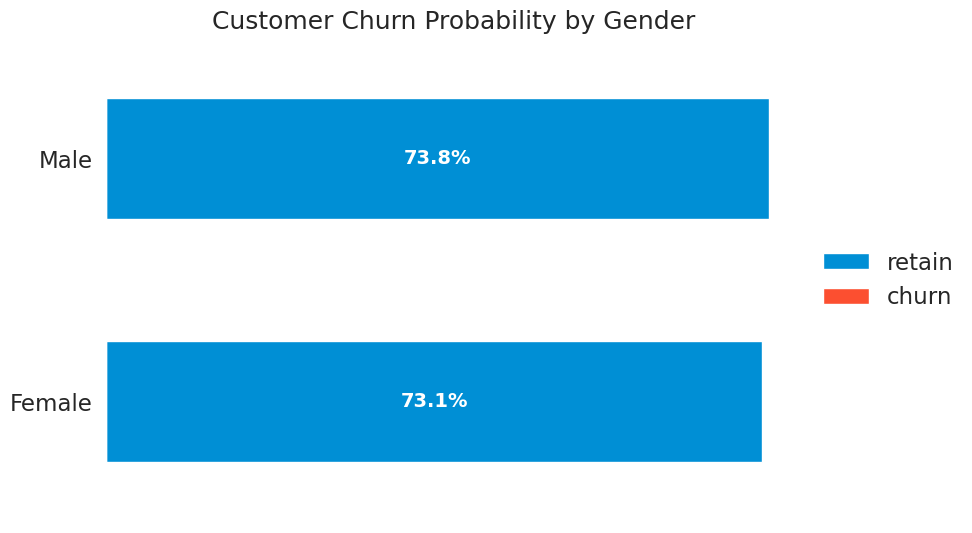

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['#1f77b4', '#ff7f0e'] # define two colors for the bars
labels = ['Female ({:.1f}%)', 'Male ({:.1f}%)'] # define labels with placeholders for the percentages

# calculate the percentages and format the labels
counts = data_viz['gender'].value_counts(normalize=True) * 100
labels = [label.format(counts[i]) for i, label in enumerate(labels)]

# call the stacked_bar_plot function with the updated parameters
stacked_bar_plot(data=data_viz, x='gender', y='Churn', ax=ax,  show=False)

drive = '/content/lp3'
fname = 'churn-probability-by-gender.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()


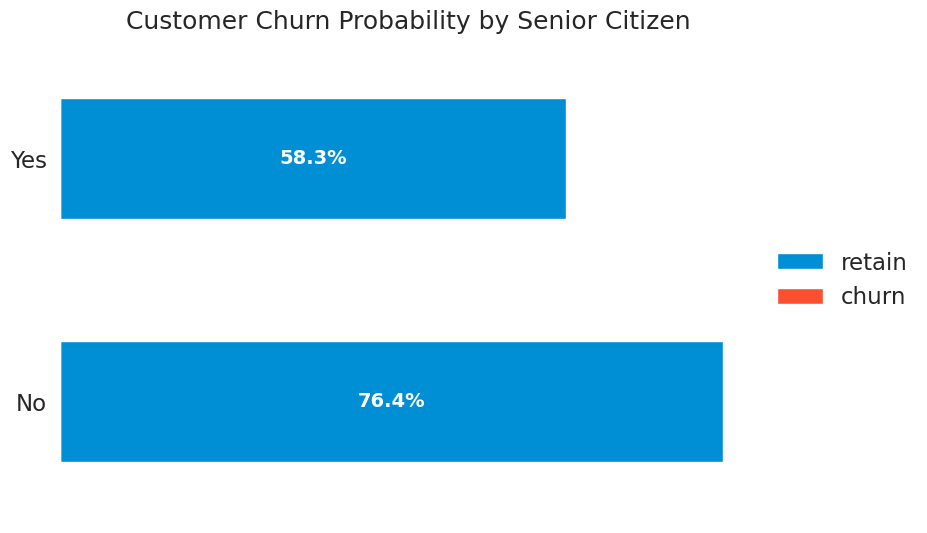

In [35]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='SeniorCitizen', y='Churn', ax=ax, show=False)

drive = '/content/lp3'
fname = 'churn-probability-by-senior-citizen.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 3.4. Churn Probability

### 3.4.1. All Categories

In [36]:
columns = data_viz['Churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,Churn,retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Senior Citizen (Yes),0.416813,0.583187
4,Paperless Billing (Yes),0.335651,0.664349
5,Partner (No),0.329580,0.670420
6,Online Security (No),0.313296,0.686704
7,Dependents (No),0.312791,0.687209
8,Tech Support (No),0.311862,0.688138
9,Streaming Tv (Yes),0.300702,0.699298


### 3.4.2. Top 5 Churn Probability

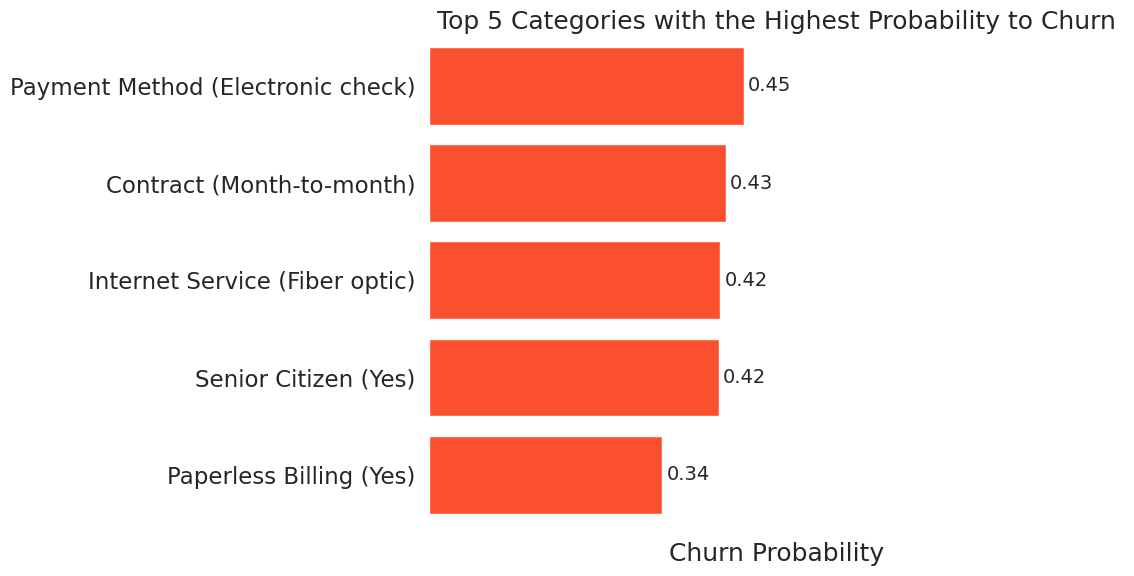

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='Churn', y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/lp3'
fname = 'top-5-churn-probability.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 3.4.3. Top 5 Retain Probability

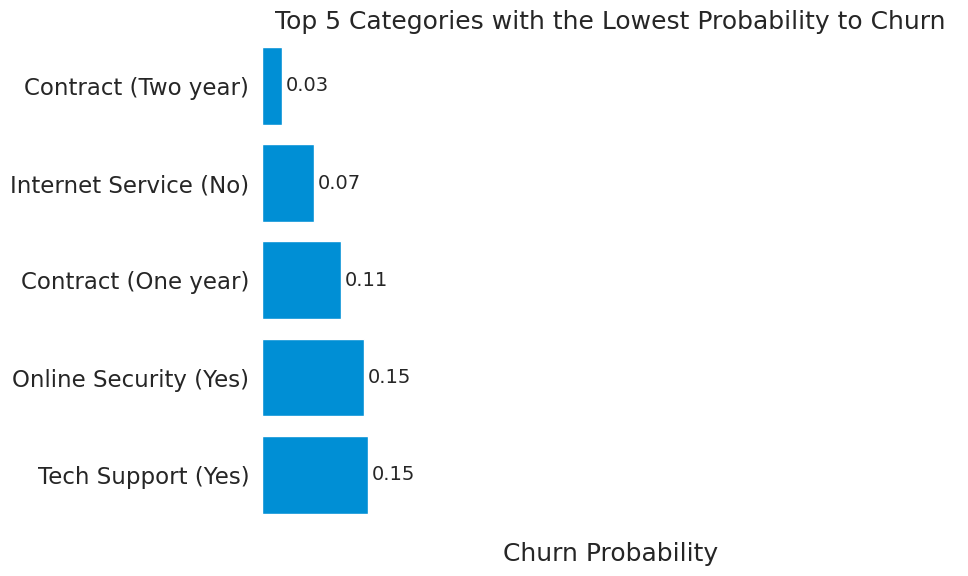

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('Churn'), x='Churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/lp3'
fname = 'top-5-retain-probability.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')



plt.show()

## 3.5. How About The Numerical Data?

### 3.5.1. Churn Probability by Tenure

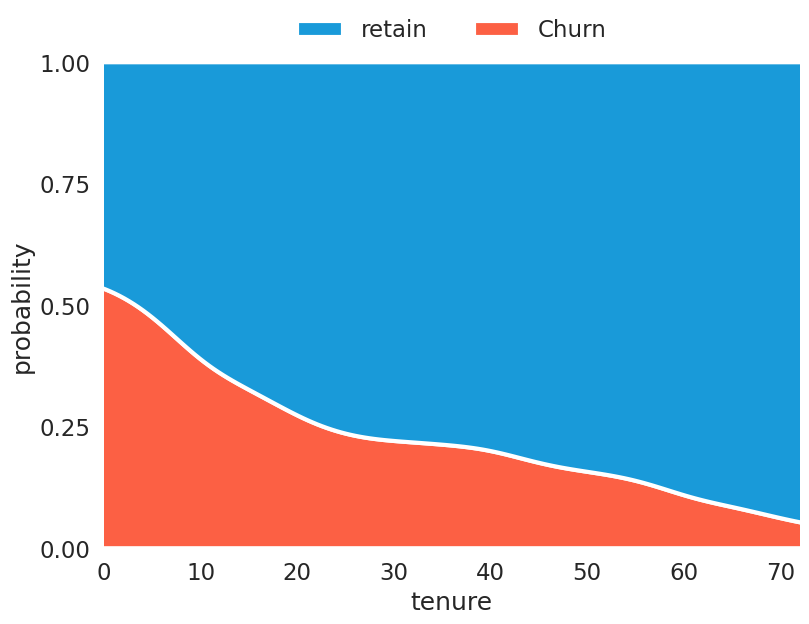

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='Churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')

drive = '/content/lp3'
fname = 'churn-probability-by-tenure.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [40]:
#using plotly:
import plotly.express as px

fig = px.histogram(data_viz, x="tenure", color="Churn", marginal="rug", nbins=30,
                   opacity=0.9, barmode="overlay", histnorm="probability")

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=10),
    yaxis=dict(tickmode='linear', tick0=0, dtick=0.2),
    legend=dict(x=0.5, y=1.15, orientation="h", bgcolor="rgba(0,0,0,0)"),
    margin=dict(l=50, r=50, b=50, t=50),
    plot_bgcolor='white'
)

fig.show()


Very clear trend:!:

We can say, tenure has a negative correlation with the probability of churn.

We can look at the short tenure (let's say the first 4 month), the probability of churn is quite high. It suggests that this is the time for new customers to try the services. Then, they consider whether they will continue to use the services or not.

### 3.5.2. Tenure by Contract Type

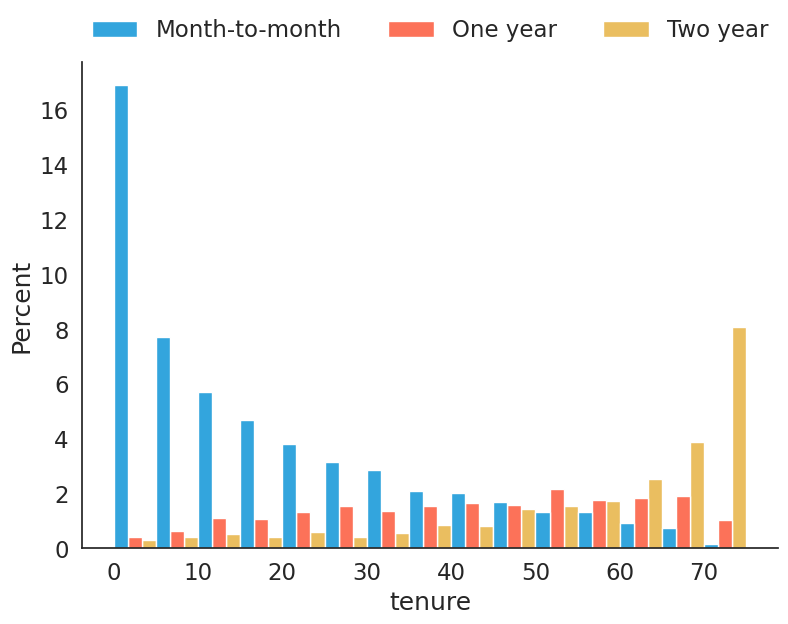

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='tenure', hue='Contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  

drive = '/content/lp3'
fname = 'tenure-distribution-by-contract.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [42]:
import plotly.express as px

fig = px.histogram(data_viz, x="tenure", color="Contract", marginal="box",
                   barmode="group", nbins=30, opacity=0.8, histnorm="percent")

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=10),
    yaxis=dict(tickmode='linear', tick0=0, dtick=10),
    legend=dict(x=0.5, y=1.15, orientation="h", bgcolor="rgba(0,0,0,0)"),
    margin=dict(l=50, r=50, b=50, t=50),
    plot_bgcolor='white'
)

fig.show()


In the previous section (Churn Probability), we found that month-to-month contracts have a fairly high chance of churn. Morover, it's the second category with the highest probability to churn.

Here, we try to analyze the distribution of tenure based on the type of contract.

It can be seen that customers who take month-to-month contracts mostly have short tenures. There are around 25% of customers who have a month-to-month contract and tenure is less than 5 months.

This could be a new assumption:

Short tenure means that the customer is still new to the service
New customers have a tendency to take the shortest contract, i.e. month-to-month contract



*It's like when we taste new food. We will try 1 spoon first, not immediately take 1 bowl. If it's good, we'll take more food. If it doesn't taste good, we definitely won't keep eating it. But this is an exception for people who really eat everything huh ~:

### 3.5.3. Churn Probability by Monthly Charges

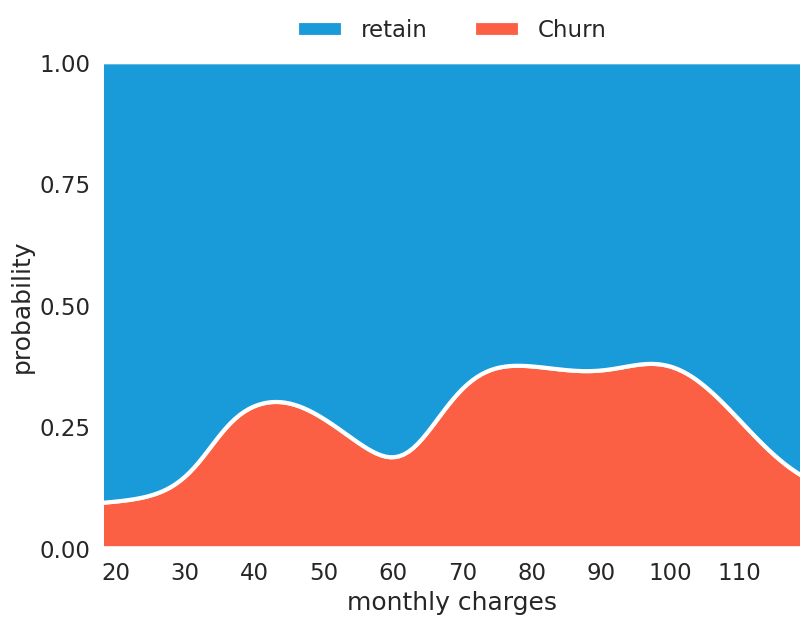

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='MonthlyCharges', hue='Churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['MonthlyCharges'].max(),10))
ax.set_xlim(data_viz['MonthlyCharges'].min(),data_viz['MonthlyCharges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

drive = '/content/lp3'
fname = 'churn-probability-by-monthly-charges.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [44]:
import plotly.express as px

fig = px.histogram(data_viz, x="MonthlyCharges", color="Churn", marginal="rug",
                   histnorm="probability density", nbins=30, opacity=0.8)

fig.update_layout(
    xaxis_title="Monthly Charges",
    yaxis_title="Probability",
    legend=dict(x=0.5, y=1.15, orientation="h", bgcolor="rgba(0,0,0,0)"),
    margin=dict(l=50, r=50, b=50, t=50),
    plot_bgcolor='white'
)

fig.show()


It has no clear trend

As we can see, at 60 it goes down, suddenly goes up again, and then drops again when the monthly charges are more than 100.

It can be said that a high price also gets a worthy benefit so that customers feel 😊"Ah, it's worth spending my precious money for this".

Even so, we can suggest the business team minimize this churn rate for some specific segments. For example, by adding certain privileges to customers who have high monthly charges.

### 3.5.4. Numerical Data Distribution

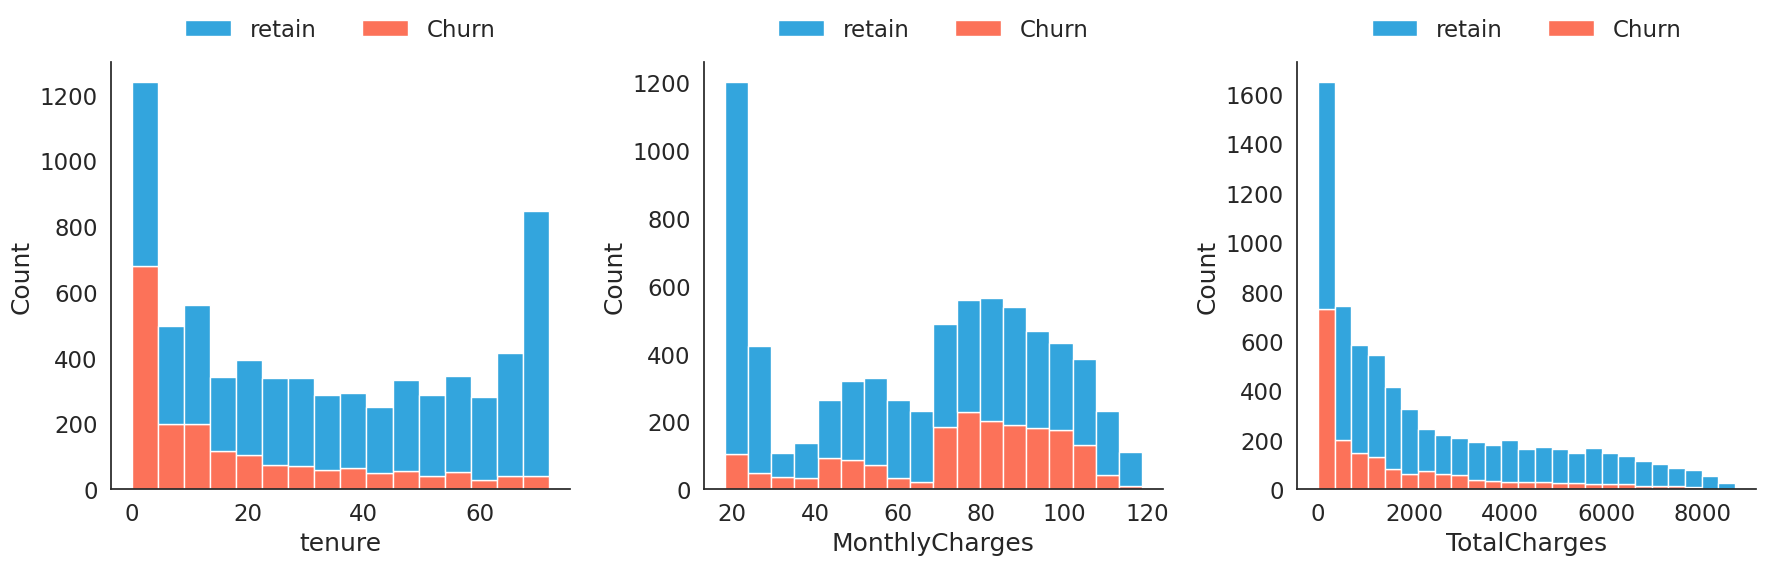

In [45]:

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_viz, x=col, hue='Churn', multiple='stack', ax=ax[i], alpha=0.8)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()

drive = '/content/lp3'
fname = 'numerical-data-distribution.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

The numerical data distribution is not in normal distribution

### 3.6. Attribute Associations to Churn Status

"Does this attribute have a strong relationship with churn status?"

To answer this question, we will calculate the association between attributes and target variable. Technically, association refers to any relationship between two variables, whereas correlation is often used to refer only to a linear relationship between two variables. ([Analyse-it](https://analyse-it.com/docs/user-guide/multivariate/correlation))

Cramer’s V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic. ([Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))



In human language, this associations function is used to calculate the correlation between attributes using some scenarios:
  - Numerical & numerical attributes (`num_num_assoc`), used to calculate numerical-numerical association using:
      - Pearson's R (`pearson`)
      - Spearman's R (`spearman`)
      - Kendall's Tau (`kendall`)
  - Nominal & nominal attributes (`nom_nom_assoc`), used to calculate nominal-nominal association using:
      - Cramer's V (`cramer`)
      - Theil 's U (`theil`)
  - Nominal & numerical attributes (`nom_num_assoc`), used to calculate nominal-numerical association using:
      - Correlation ratio (`correlation_ratio`)




We won't deep down 

## 4. Data Preprocessing

### 4.1. Train - Test Split

We use a 80% : 20% ratio for the training set and testing set respectively.

In [46]:
data_X = data.drop('Churn', axis=1)
data_y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2,
                                                    random_state=1, stratify=data_y)

In [48]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)

X_train shape	: (5634, 19)
y_train shape	: (5634,)

X_test shape	: (1409, 19)
y_test shape	: (1409,)


### 4.2. Label Encoding

We will use it for the target variable.

In [49]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)
     

In [50]:
le.classes_

array(['No', 'Yes'], dtype=object)

From this output, we can say that retaining customers (`churn = No`) will be encoded as **0**, and churned customers (`churn = Yes`) will be encoded as **1**.

In [51]:
print(y_train[:5].values)
print(y_train_encode[:5])

['Yes' 'Yes' 'No' 'No' 'No']
[1 1 0 0 0]


### 4.3. One Hot Encoding

In [52]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [53]:
X_train_ohe

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### 4.4. Encoded Dataframe

Lets combine the encoded features and the numerical features. Make sure that the index is the same.

In [54]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [56]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

column_ohe

array(['gender_male', 'senior_citizen_yes', 'partner_yes',
       'dependents_yes', 'phone_service_yes', 'multiple_lines_yes',
       'internet_service_dsl', 'internet_service_fiber_optic',
       'internet_service_no', 'online_security_yes', 'online_backup_yes',
       'device_protection_yes', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'contract_month_to_month',
       'contract_one_year', 'contract_two_year', 'paperless_billing_yes',
       'payment_method_bank_transfer', 'payment_method_credit_card',
       'payment_method_electronic_check', 'payment_method_mailed_check'],
      dtype=object)

### 4.4.1. Train Set

In [57]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2246,Female,No,Yes,Yes,1,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.45,102.45
6843,Female,No,Yes,No,9,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),91.75,865.80
159,Male,No,No,No,10,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),25.70,251.60
6259,Male,No,Yes,Yes,60,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),76.95,4543.95
4291,Female,No,Yes,Yes,64,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),110.30,6997.30


In [58]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

,tenure,MonthlyCharges,TotalCharges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
2246,1,102.45,102.45,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6843,9,91.75,865.80,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
159,10,25.70,251.60,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6259,60,76.95,4543.95,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4291,64,110.30,6997.30,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 4.4.2. Test Set

In [59]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6826,Male,No,No,No,4,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),20.70,83.75
687,Male,Yes,No,No,2,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.25,91.10
3787,Female,No,No,No,58,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.30,5817.70
4130,Female,No,No,No,10,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374.00
640,Male,No,Yes,Yes,68,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),25.40,1620.20


In [60]:

# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

,tenure,MonthlyCharges,TotalCharges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6826,4,20.70,83.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
687,2,49.25,91.10,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3787,58,95.30,5817.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4130,10,36.25,374.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
640,68,25.40,1620.20,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### 4.4.3. Encoded Dataframe

In [61]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='Churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='Churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['Churn_1'].fillna(data_encode['Churn_2'], inplace=True)
data_encode.drop(columns='Churn_2', inplace=True)
data_encode.rename(columns={'Churn_1':'Churn'}, inplace=True)

data_encode.head()

,tenure,MonthlyCharges,TotalCharges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,Churn
2246,1,102.45,102.45,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6843,9,91.75,865.80,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
159,10,25.70,251.60,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6259,60,76.95,4543.95,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4291,64,110.30,6997.30,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### 4.5. Feature Scaling

In [62]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

4.6. Scaled Dataframe

This dataframe has been encoded and scaled

In [63]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='Churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='Churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['Churn_1'].fillna(data_scale['Churn_2'], inplace=True)
data_scale.drop(columns='Churn_2', inplace=True)
data_scale.rename(columns={'Churn_1':'Churn'}, inplace=True)

data_scale.head()

,tenure,MonthlyCharges,TotalCharges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,Churn
2246,0.014,0.838,0.012,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6843,0.125,0.731,0.100,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
159,0.139,0.073,0.029,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6259,0.833,0.583,0.523,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4291,0.889,0.916,0.806,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='Churn', index=X_train_scale.index)], axis=1)
data_scale_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,Churn
2246,0.014,0.838,0.012,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6843,0.125,0.731,0.100,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
159,0.139,0.073,0.029,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
6259,0.833,0.583,0.523,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4291,0.889,0.916,0.806,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


### 4.7. Correlation

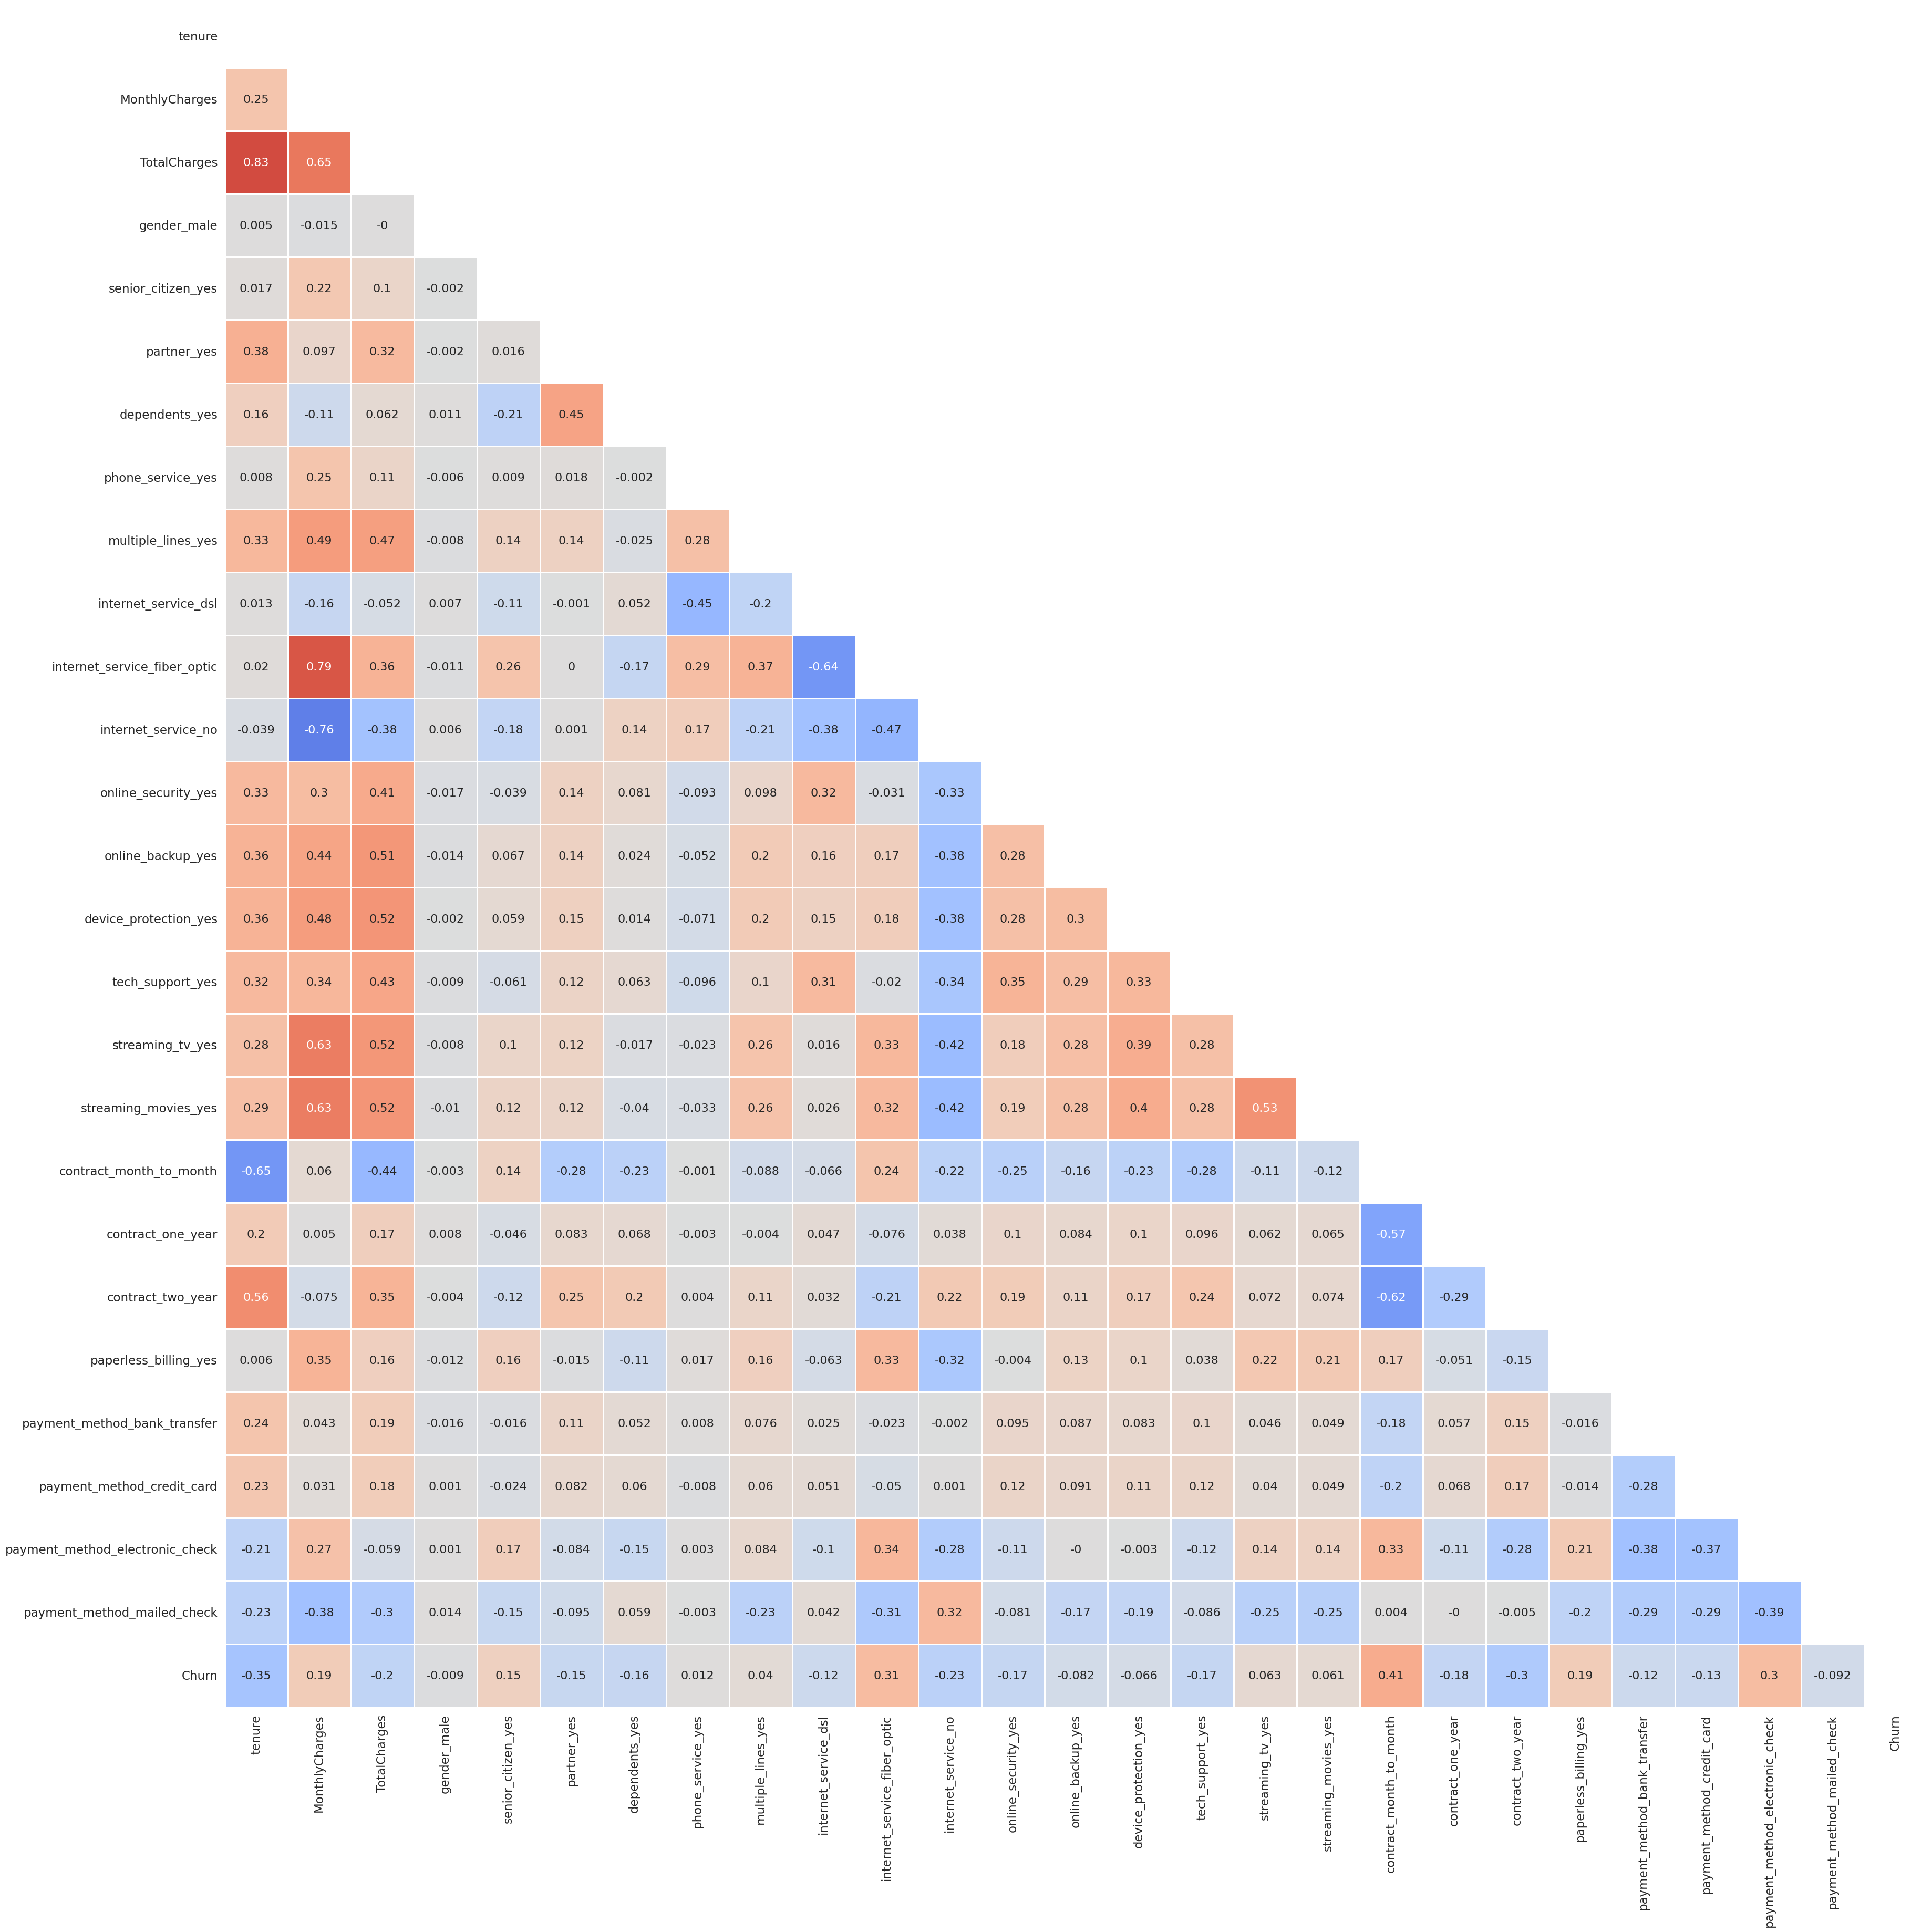

In [66]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

In [67]:
import plotly.express as px

corr_matrix = data_scale.corr().round(3)

fig = px.imshow(corr_matrix, 
                x=corr_matrix.columns, y=corr_matrix.columns, 
                color_continuous_scale='RdBu', 
                range_color=[-1, 1])

fig.update_layout(
    title='Correlation Matrix',
    width=800, height=800,
    xaxis_title='Features',
    yaxis_title='Features',
    font=dict(size=14),
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.update_xaxes(side="top")

fig.show()


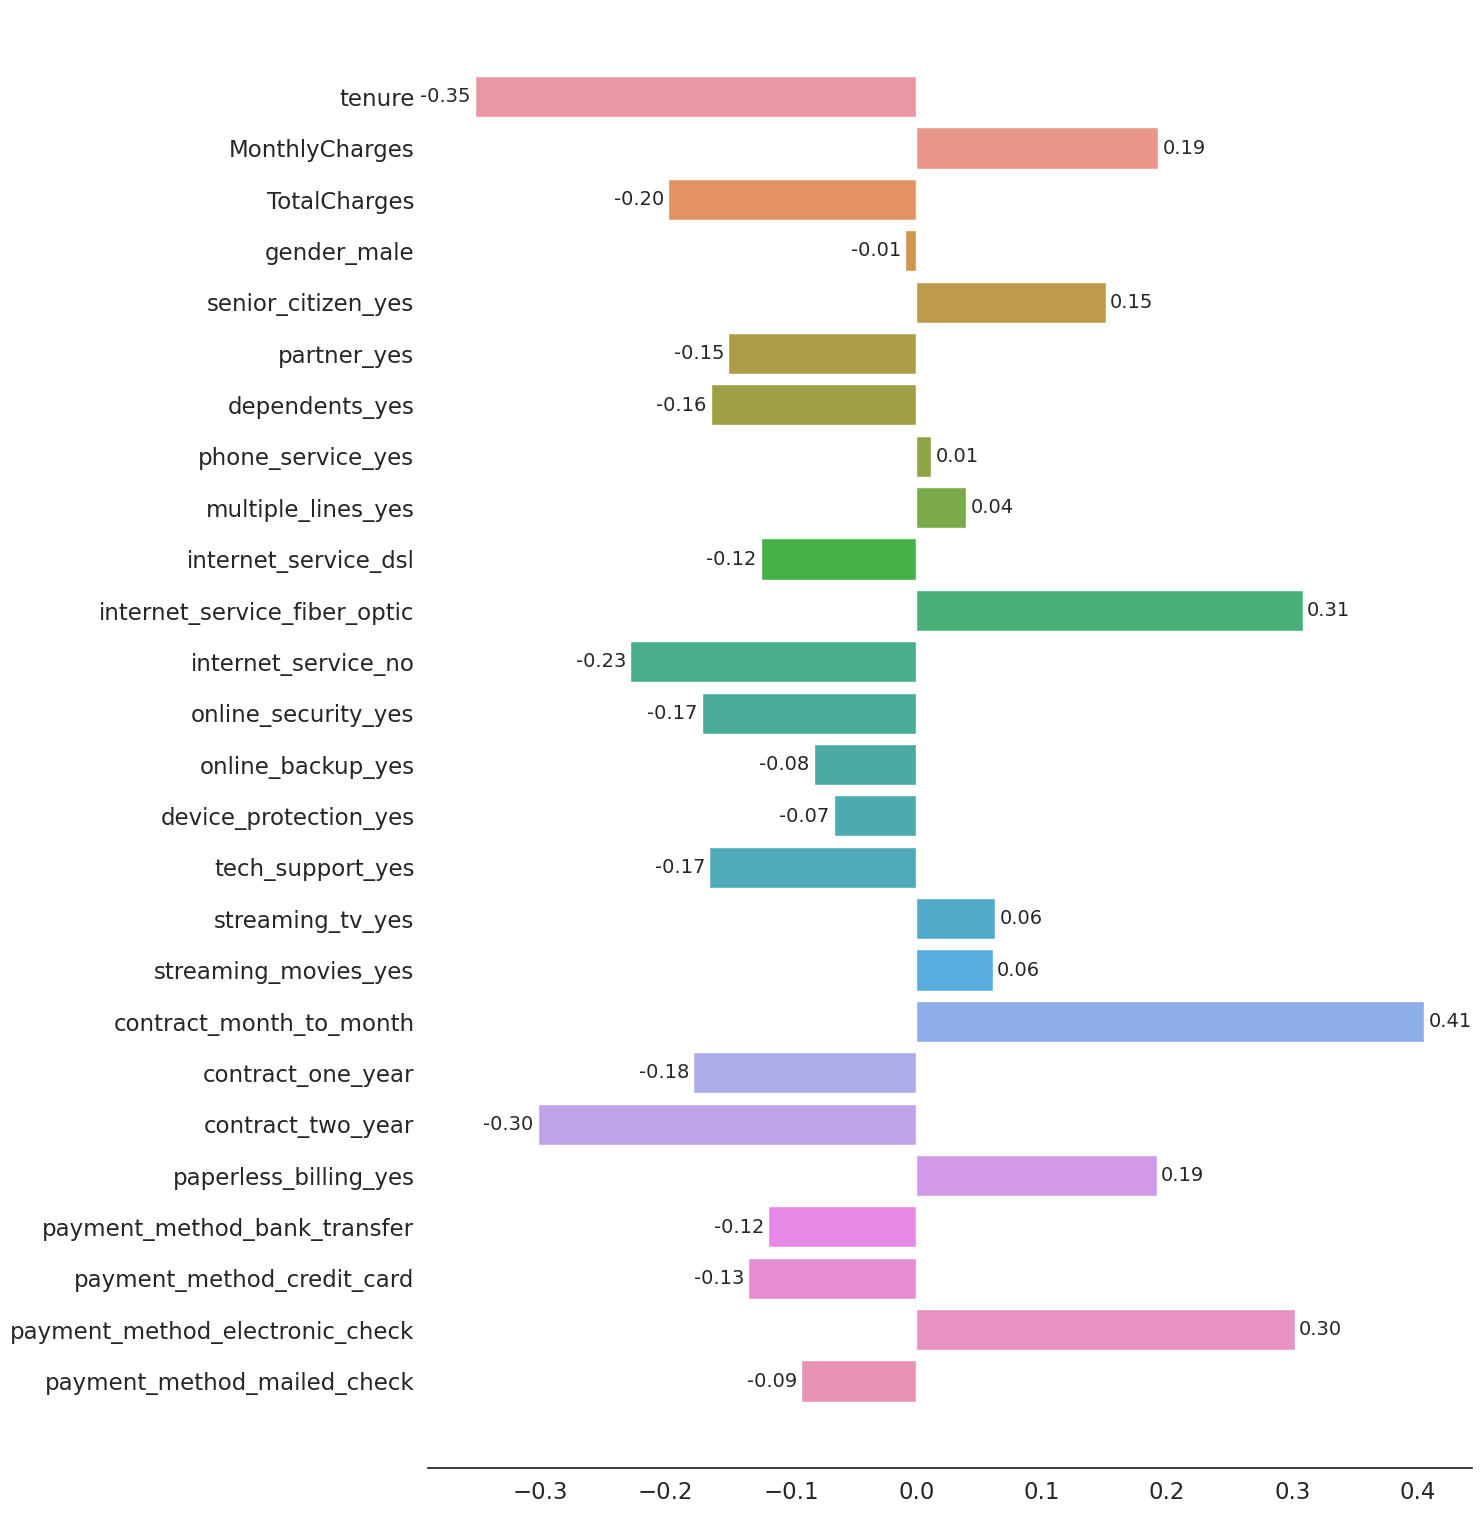

In [68]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Churn'].drop('Churn')

fig, ax = plt.subplots(figsize=(12,18))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

In [69]:
import plotly.express as px

corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Churn'].drop('Churn').sort_values()

fig = px.bar(x=corr_target.values, y=corr_target.index, orientation='h',
             labels={'x': 'Correlation', 'y': 'Features'},
             template='plotly_white',
             height=500, width=800)
fig.update_layout(xaxis_range=[-1, 1], xaxis_ticksuffix='%')
fig.update_traces(marker_color='rgb(253,174,107)', marker_line_width=1.5, marker_line_color='rgb(111,111,111)')
fig.show()


### 4.7.1. Positive Correlation

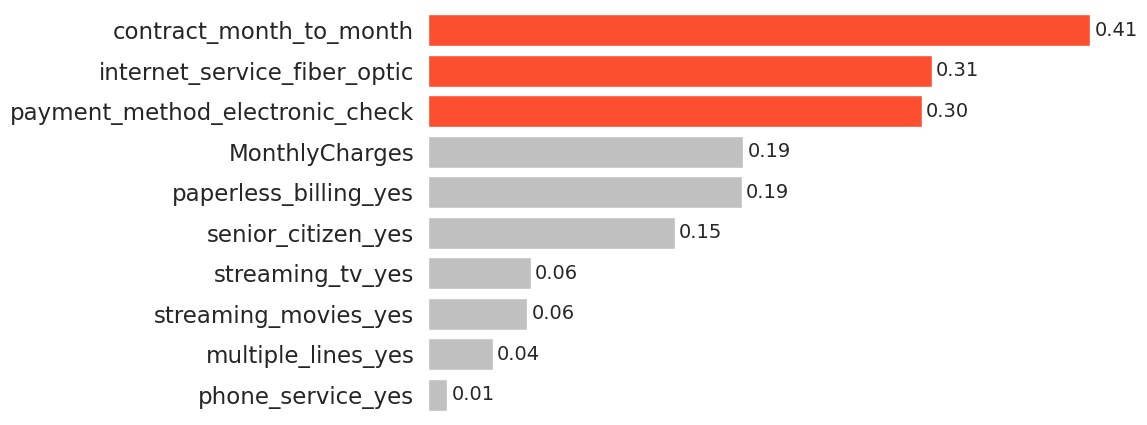

In [70]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

corr_positive = corr_target[corr_target >= 0]

threshold_top = 3
palette = []
for i in range(0, len(corr_positive)):
  if i < threshold_top:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x=corr_positive.values, y=corr_positive.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/lp3'
fname = 'positive-correlation.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [83]:
import plotly.graph_objects as go

corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

corr_positive = corr_target[corr_target >= 0]

threshold_top = 3
palette = []
for i in range(0, len(corr_positive)):
    if i < threshold_top:
        palette.append('#FC4F30') # red
    else:
        palette.append('silver')

fig = go.Figure(go.Bar(
    x=corr_positive.values,
    y=corr_positive.index,
    marker_color=palette,
    orientation='h'
))

fig.update_layout(
    height=500,
    xaxis_showticklabels=False,
    yaxis_title='',
    font=dict(size=14)
)

fig.update_traces(
    texttemplate='%{x:.2f}',
    textposition='outside',
    textfont=dict(size=14, color='black')
)

fig.show()


### 4.7.2. Negative Correlation

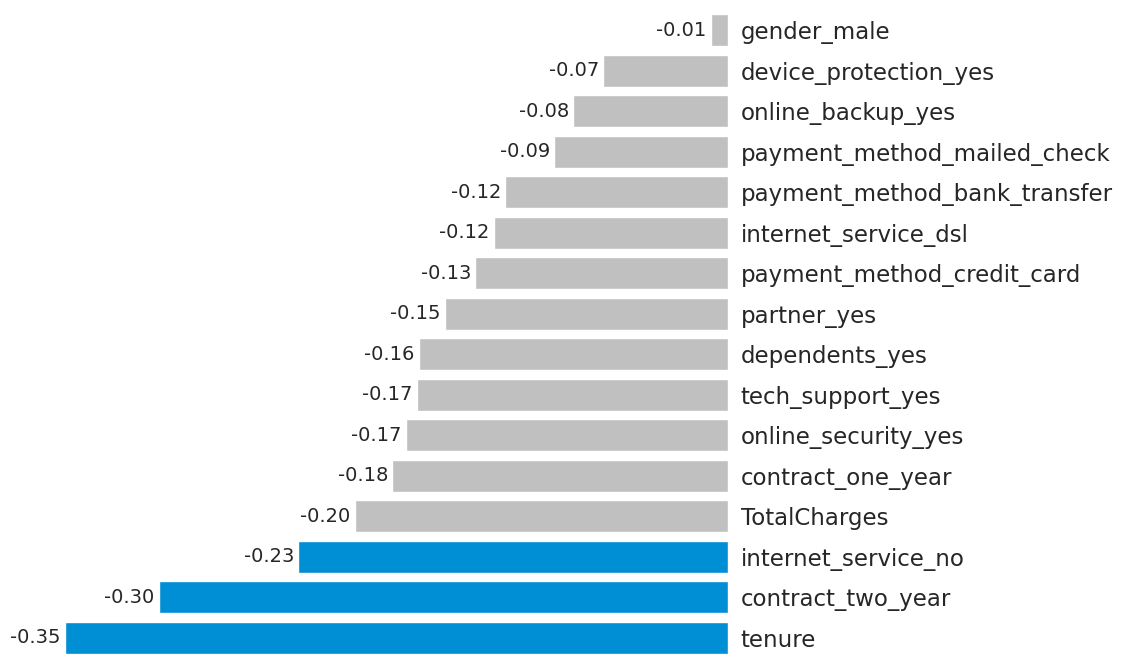

In [79]:
corr_negative = corr_target[corr_target < 0]

threshold_top = 3
threshold_bot = corr_negative.size - threshold_top - 1
palette = []
for i in range(0, len(corr_negative)):
  if i > threshold_bot:
    palette.append('#008FD5') # blue
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([])

sns.despine(left=True, bottom=True)
plt.tick_params(right=False)

drive = '/content/lp3'
fname = 'negative-correlation.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()
     

In [86]:
import plotly.graph_objects as go

corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['Churn'].drop('Churn').sort_values(ascending=True)

corr_negative = corr_target[corr_target < 0]

threshold_top = 3
palette = []
for i in range(0, len(corr_negative)):
    if i < threshold_top:
        palette.append('#FC4F30') # red
    else:
        palette.append('silver')

fig = go.Figure(go.Bar(
    x=corr_negative.values,
    y=corr_negative.index,
    marker_color=palette,
    orientation='h'
))

fig.update_layout(
    height=500,
    xaxis_showticklabels=False,
    yaxis_title='',
    font=dict(size=14)
)

fig.update_traces(
    texttemplate='%{x:.2f}',
    textposition='outside',
    textfont=dict(size=14, color='black')
)

fig.show()


### 4.8. Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods

In [87]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')


In [88]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

Let's take a look at the balanced dataframe.

In [90]:
data_scale_train['Churn'].value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [91]:
data_smote['Churn'].value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

Now, both retain (0) and churn (1) categories have the same number.

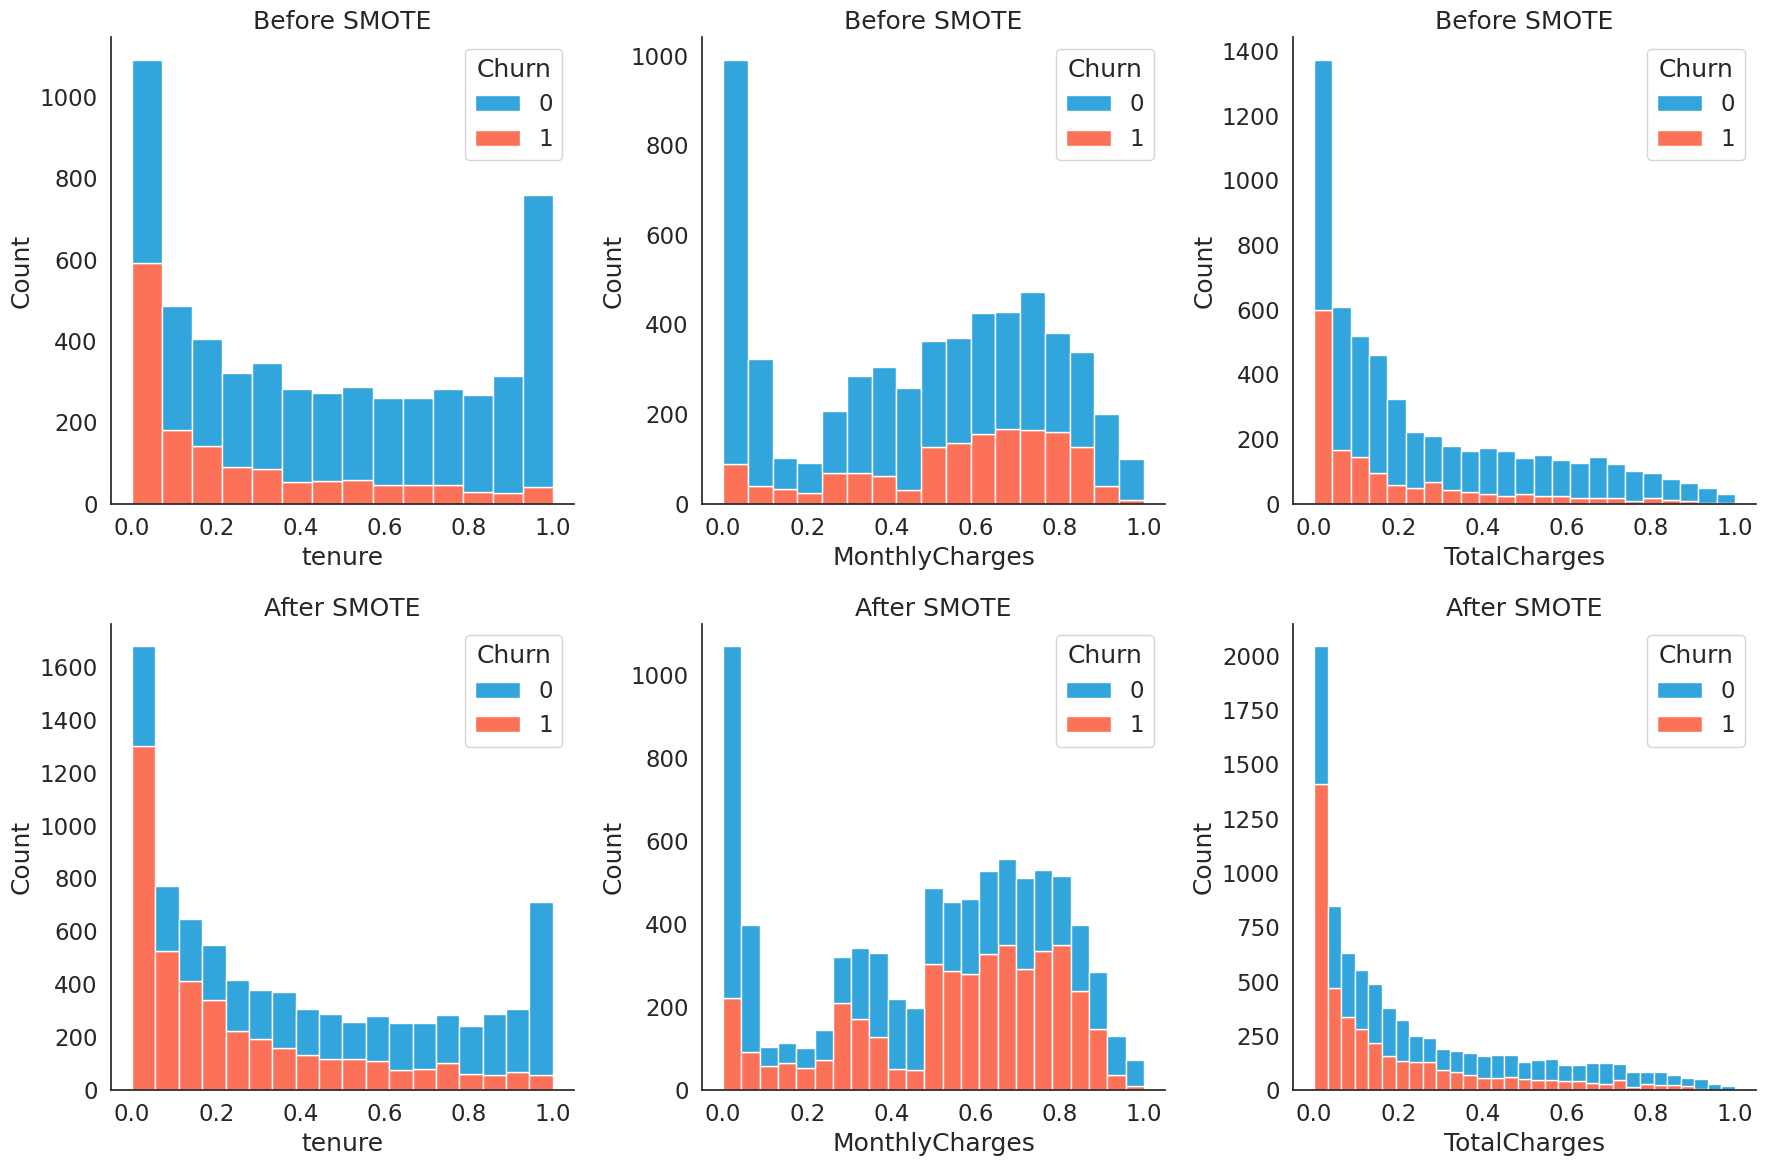

In [92]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_scale_train, x=col, hue='Churn', multiple='stack', ax=axes_list[i], alpha=0.8)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smote, x=col, hue='Churn', multiple='stack', ax=axes_list[i+3], alpha=0.8)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

In [93]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3, subplot_titles=[f'Before SMOTE: {col}' for col in column_numerical] + [f'After SMOTE: {col}' for col in column_numerical])

for i, col in enumerate(column_numerical):
    for churn in [0, 1]:
        fig.add_trace(
            go.Histogram(
                x=data_scale_train.loc[data_scale_train['Churn'] == churn, col],
                nbinsx=20,
                histnorm='percent',
                name='Churn' if churn == 1 else 'Not Churn',
                opacity=0.7,
            ),
            row=1, col=i+1 if i < 3 else i-2
        )

for i, col in enumerate(column_numerical):
    for churn in [0, 1]:
        fig.add_trace(
            go.Histogram(
                x=data_smote.loc[data_smote['Churn'] == churn, col],
                nbinsx=20,
                histnorm='percent',
                name='Churn' if churn == 1 else 'Not Churn',
                opacity=0.7,
            ),
            row=2, col=i+1 if i < 3 else i-2
        )

fig.update_layout(
    height=600,
    width=1000,
    showlegend=False,
    title={
        'text': "Distribution of Numeric Features Before and After SMOTE",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Feature Values",
    yaxis_title="Percent of Data",
    font=dict(size=14),
)

fig.show()


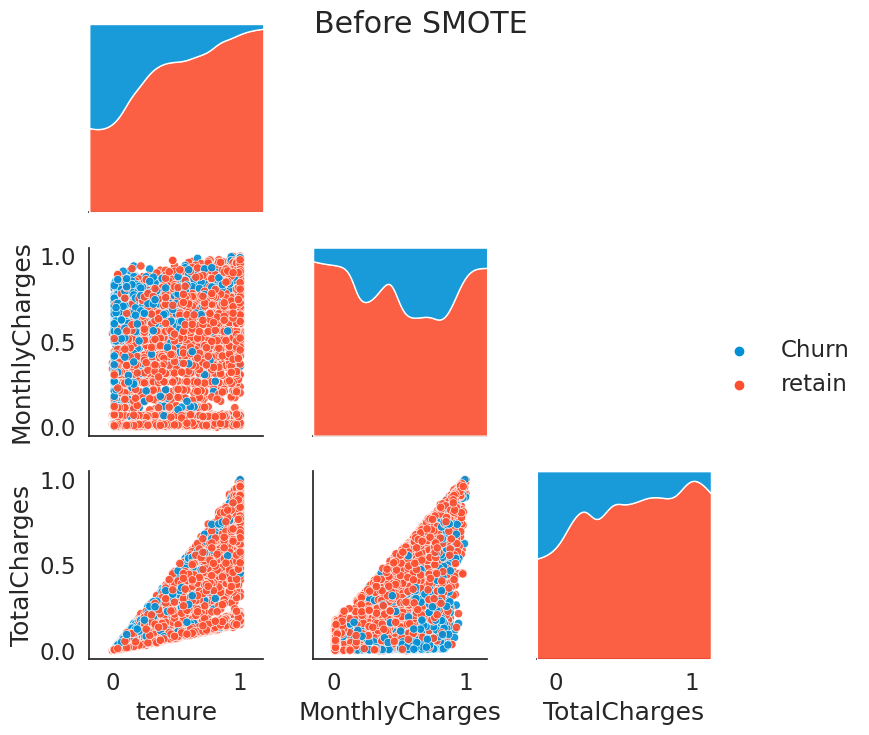

In [94]:
tmp_df = data_scale_train.copy()
tmp_df.loc[:,'Churn'] = tmp_df.loc[:,'Churn'].apply(lambda x: 'Churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='Churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('Before SMOTE')

drive = '/content/lp3'
fname = 'data-distribution-before-smote.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

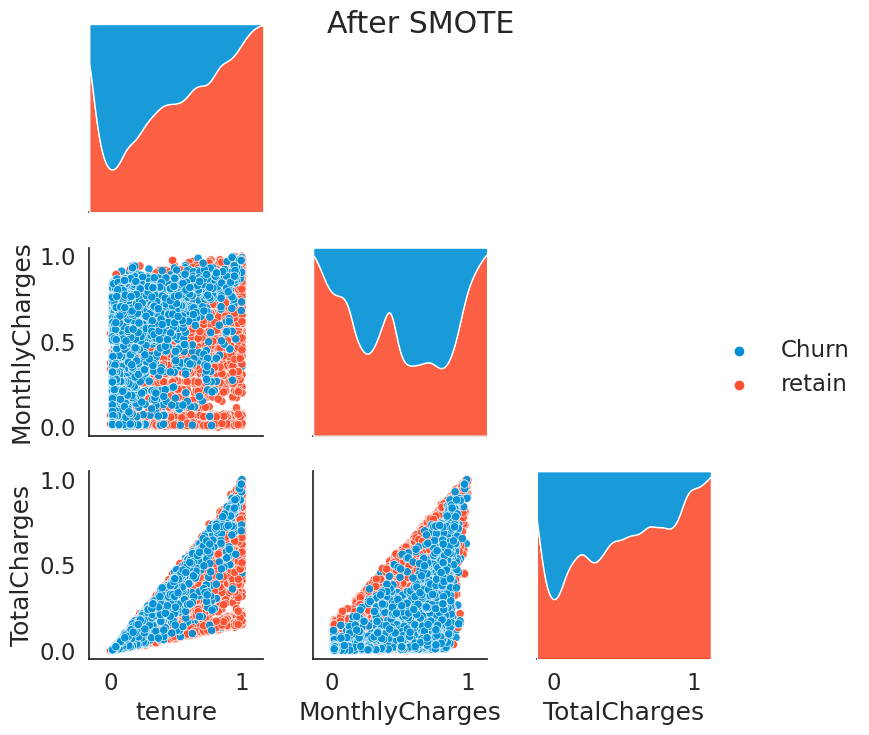

In [97]:

tmp_df = data_smote.copy()
tmp_df.loc[:,'Churn'] = tmp_df.loc[:,'Churn'].apply(lambda x: 'Churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='Churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('After SMOTE')

drive = '/content/lp3'
fname = 'data-distribution-after-smote.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

# 5. Model Development & Evaluation
## 5.1. Scoring Function
5.1.1. Get Score

In [98]:
def get_score(y_pred_list, y_test, average=None, show=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if show:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df
     

5.1.2. Harmonic Mean

Harmonic mean between accuracy and recall

In [99]:
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  
  return fbeta_score

## 5.2. 

### Default Parameter

In [106]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()
     

In [107]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.738822,0.701846,0.749649,0.707206,0.749649
Ridge Classifier,0.741661,0.705721,0.754996,0.710991,0.754996
KNN,0.693400,0.659490,0.699093,0.659429,0.699093
SVC,0.768630,0.714889,0.746032,0.725042,0.746032
Neural Network,0.740241,0.675162,0.689995,0.681047,0.689995
Decision Tree,0.723208,0.652398,0.662178,0.656479,0.662178
Random Forest,0.785664,0.726105,0.732866,0.729285,0.732866
Gradient Boosting Classifier,0.781405,0.726898,0.754728,0.736993,0.754728
AdaBoost Classifier,0.764372,0.721296,0.767894,0.730889,0.767894


Overall, boosting methods show a good performance. So, we will only use the boosting methods for the next process.

In [104]:

model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [105]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.781405,0.726898,0.754728,0.736993,0.754728
AdaBoost Classifier,0.764372,0.721296,0.767894,0.730889,0.767894
CatBoost Classifier,0.791341,0.732815,0.736730,0.734709,0.736730
Hist Gradient Boosting,0.780696,0.720430,0.729484,0.724579,0.729484
XGBoost,0.790632,0.731651,0.732832,0.732236,0.732832
LightGBM,0.781405,0.721084,0.729113,0.724805,0.729113


In [47]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')